## Predict Survivor of Titanic

Here I am adapting "Rafal Plis" in one of Kernel - Titanic Competition.
In Summary, my activity will be:

**1. Preprocessing of dataset (field will be used: PClass, Sex, ParchCat, SibSpCat, Embarked, Fare, TitleCat, Age, TicketCat, CabinCat) **

**2. Predict using some of Classifier Algorithm **

**3. Compare the accuracy each Classifier**

In [1]:
# Load library related
library('ggplot2') #visualization
library('ggthemes') #visualization
library('scales') #visualization
library('dplyr') #data manipulation
library('mice') #imputation
library('randomForest') #classification algorithm : Random Forest
library("e1071") #classification algorithm : Support Vector Machine (SVM)
library(class) #classification algorithm : KNN
library(C50) #classification algorithm : C5.0 Binary Tree
library(rpart) #Classification algorithm : Rpart Binary Tree


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [2]:
# Read dataset
train <- read.csv("../input/train.csv")
test <- read.csv("../input/test.csv")
full <- bind_rows(train,test)
head(full)

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning mess

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


### Exploratory Data Analysis (EDA)

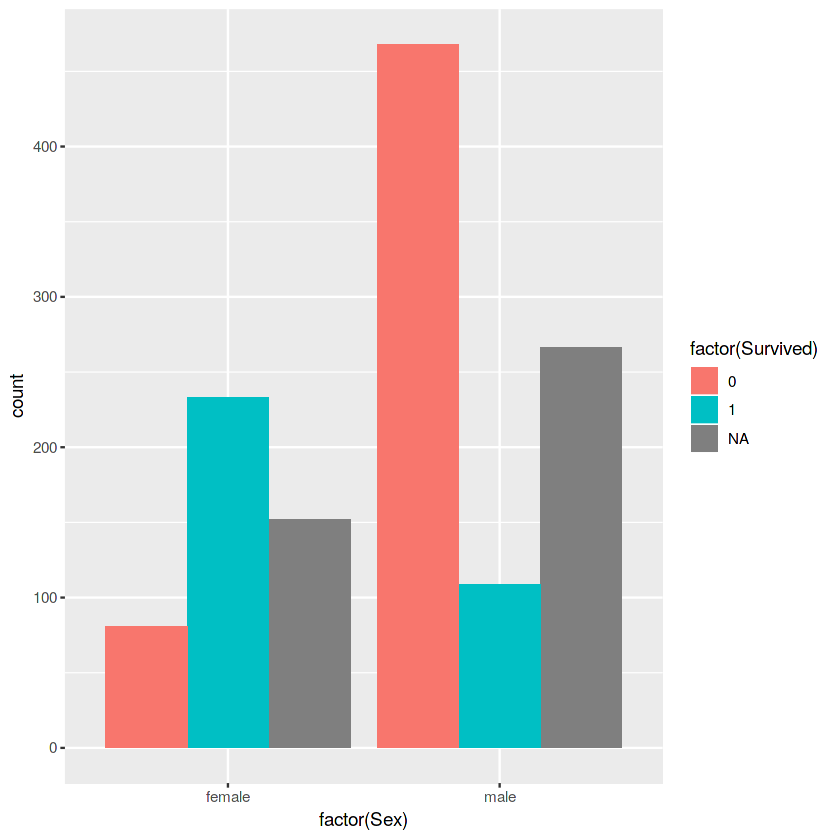

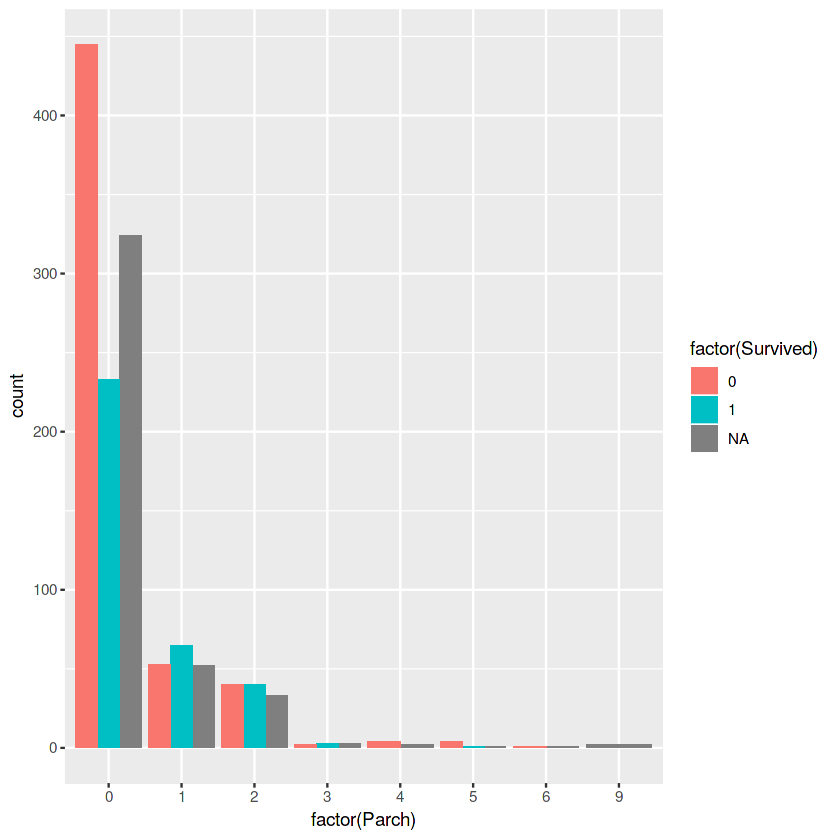

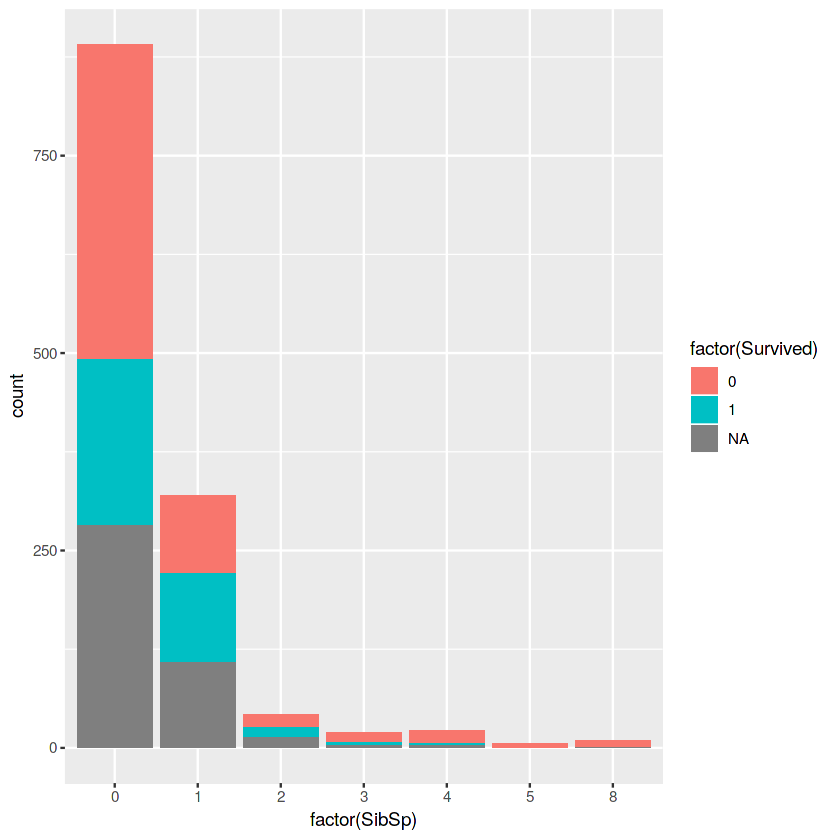

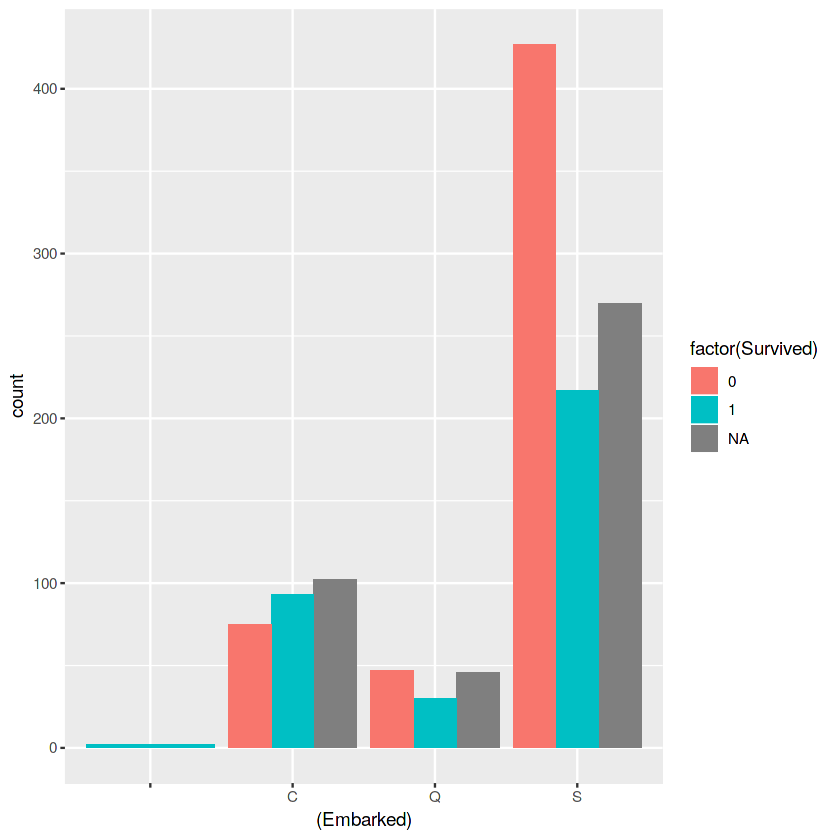

In [3]:
# See possible feature might has correlation with Survival Rate
ggplot(full, aes(x= factor(Sex), fill= factor(Survived))) + geom_bar(position = 'dodge');
ggplot(full, aes(x= factor(Parch), fill= factor(Survived))) + geom_bar(position = 'dodge', stat = 'count');
ggplot(full, aes(x= factor(SibSp), fill= factor(Survived))) + geom_bar();
ggplot(full, aes(x= (Embarked), fill = factor(Survived))) + geom_bar(position = 'dodge');

In [4]:
# Check if there is incomplete value in dataset

sum(is.na(full$Pclass)); #Complete data
sum(is.na(full$Name)); #Complete data
sum(is.na(full$Sex)); #Complete data
sum(is.na(full$Age)); #Incomplete data -> there are 263 missing data
sum(is.na(full$SibSp)); #Complete data
sum(is.na(full$Parch)); #Complete data
sum(is.na(full$Ticket)); #Complete data
sum(is.na(full$Fare)); #Incomplete data -> there is 1 missing data
sum(is.na(full$Cabin)); #Complete data
sum(is.na(full$Embarked)); #Complete data

[1] 0

[1] 0

[1] 0

[1] 263

[1] 0

[1] 0

[1] 0

[1] 1

[1] 0

[1] 0

Conclusion based on initial EDA.

### FEATURE ENGINEERING
Feature engineering is one of activity in building machine learning model which is used to derive/extract new information based on available information. Purpose of this activity is to get additional information which might improves the model. Feature engineering might be vary, depends on case or available data itself. It could be as simple as grouping to fewer groups or as sophisticated as combining knowledge in specific field.

Given Titanic dataset, I will do feature engineering to several metrics as follow:
*  ParchCat
*  SibspCat
*  TitleCat
*  Fare
*  TicketCat
*  CabinCat


#### 1. Parch - Number of Parents/Childer abroad the Titanic
I will make smaller group for Parch
There are some group that have insignificant number compared to the total number of sample

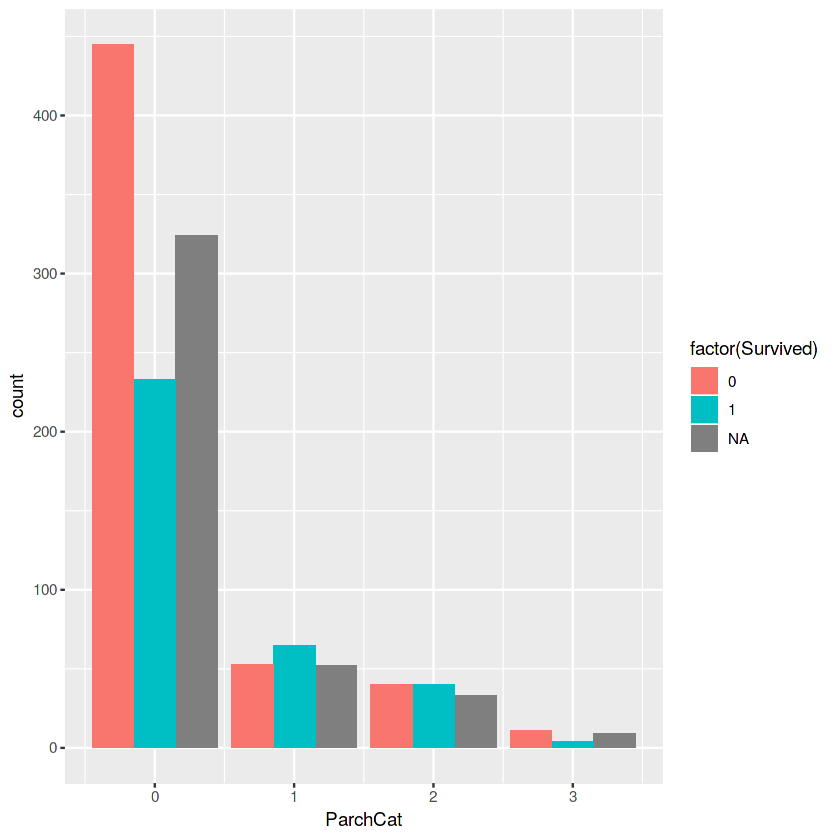

In [5]:
full$ParchCat[full$Parch == 0] <- 0
full$ParchCat[full$Parch == 1] <- 1
full$ParchCat[full$Parch == 2] <- 2
full$ParchCat[full$Parch >2 ] <- 3

ggplot(data = full, aes(x = ParchCat , fill = factor(Survived))) + geom_bar(position = 'dodge')

#### 2. SibSp - Number of siblings/spouses aboard the Titanic

Like Parch, I will reduce number of category in SibSp
As we can see in first graphic, SibSp that is higher than 4 have no survive member. So I will make this as one group

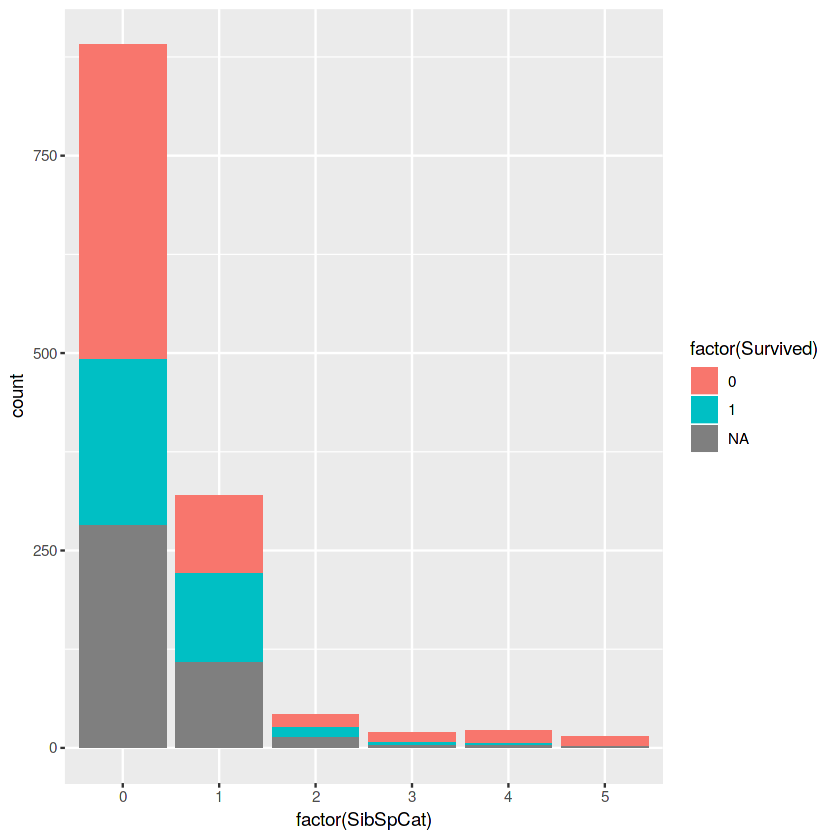

In [6]:
full$SibSpCat[full$SibSp == 0] <- 0
full$SibSpCat[full$SibSp == 1] <- 1
full$SibSpCat[full$SibSp == 2] <- 2
full$SibSpCat[full$SibSp == 3] <- 3
full$SibSpCat[full$SibSp == 4] <- 4
full$SibSpCat[full$SibSp > 4] <- 5

ggplot(full, aes(x = factor(SibSpCat) , fill = factor(Survived))) + geom_bar()

#### 3. TitleCat from Name of Passenger
Name of passenger

In [7]:
str(full$Name)
sample(full$Name, size = 5)

 chr [1:1309] "Braund, Mr. Owen Harris" ...


[1] "Icard, Miss. Amelie"                   
[2] "Andersson, Miss. Ida Augusta Margareta"
[3] "West, Mr. Edwy Arthur"                 
[4] "O'Keefe, Mr. Patrick"                  
[5] "de Brito, Mr. Jose Joaquim"

In [8]:
# Title might give additional information of gender and marital status
# Title is basically between first comma(,) and first dot (.)
# I will extract Title using Regex gsub()

full$Title <- gsub('(.*, )|(\\..*)','', full$Name)
table(full$Title)

# We have majority Title i.e Mr, Mrs, Miss, Master
# And also we have smaller group which is rare_title
# We will separate the big group, and predict what the rare_title is actually belong to

rare_title <- c('Capt', 'Col', 'Don', 
                'Dona', 'Dr', 'Jonkheer', 
                'Lady', 'Major', 'Rev', 'Sir', 
                'the Countess', 'Mlle', 'Mme', 'Ms')


full$TitleCat[full$Title == "Mr"] <- 1
full$TitleCat[full$Title == "Miss"] <- 2
full$TitleCat[full$Title == "Master"] <- 3
full$TitleCat[full$Title == "Mrs"] <- 4
full$TitleCat[full$Title %in% rare_title] <- 0 # We will group this into 1/2/3/4

table(full$TitleCat)


        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 


  0   1   2   3   4 
 34 757 260  61 197 

In [9]:
# Based on available information, we might predict Title in group 0
# Rational metrics are Sex, number of parents (Parch), and number of sibling (Sibsp)

# Temporal dataset
temp_train <- full[full$TitleCat != 0, c('PassengerId','Pclass','Sex','SibSpCat','TitleCat', 'ParchCat')]
temp_test <- full[full$TitleCat == 0, c('PassengerId','Pclass','Sex','SibSpCat','TitleCat', 'ParchCat')]

# Title prediction
temp_model <- randomForest(factor(TitleCat) ~ Sex + ParchCat + SibSpCat, data = temp_train)

# Prediction result
temp_result <- predict(temp_model,temp_test)
temp_test$TitleCat <- temp_result

# Replace Title Cat 0 with prediction result
full[full$TitleCat == 0,]$TitleCat <- temp_test$TitleCat
# See the result of this prediction
table(full$TitleCat)
# Now we have 4 gruops of Title which represent Gender and Marital Status!


  1   2   3   4 
782 268  61 198 

#### 4. Fare - Passenger Fare

first lets see what data inside Fare
Turn out there is missing data

In [10]:
# to see data that have no Fare
full[full$PassengerId[is.na(full$Fare)],]

# Based on this, the passanger is from Pclass = 3 and Embarkment = S
# Fare on the same class and embarkment might have the same range of range
# So we will use median value of fare in Pclass = 3 and Embarkment = S
full$Fare[1044] <- median(full[full$Pclass == 3 & full$Embarked == 'S',]$Fare , na.rm = TRUE)

sum(is.na(full$Fare)) # Now we dont have null value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParchCat,SibSpCat,Title,TitleCat
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,,S,0,0,Mr,1


[1] 0

#### 5. Embarked - Port of Embarkation


      C   Q   S 
  2 270 123 914 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParchCat,SibSpCat,Title,TitleCat
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,,0,0,Miss,2
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,,0,0,Mrs,4



  C   Q   S 
272 123 914 

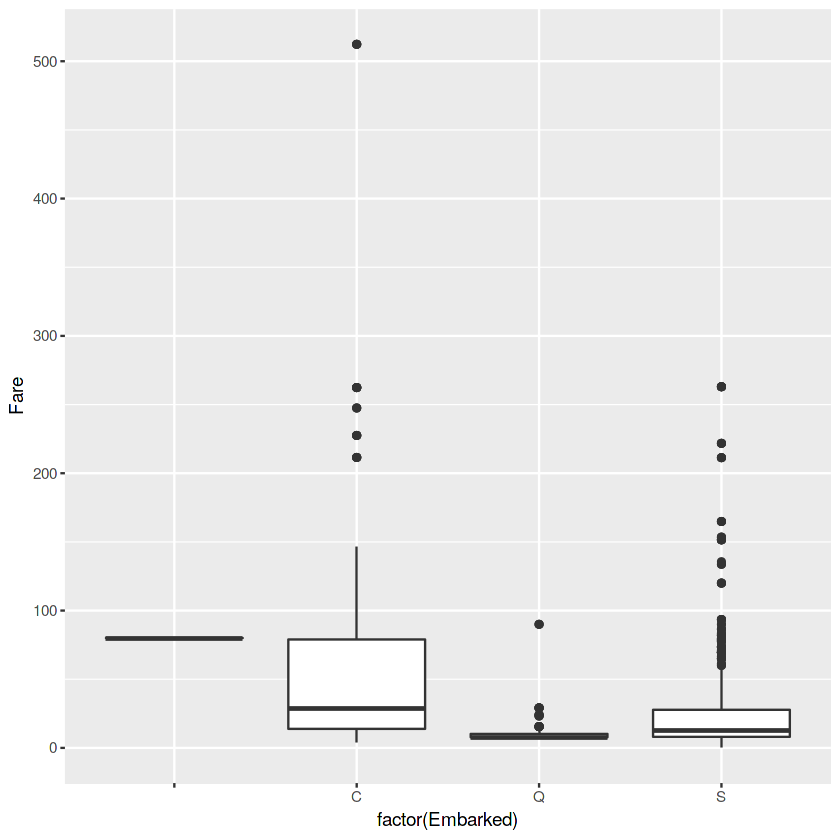

In [11]:
table(full$Embarked)
# Turn out we have two missing data in Embarked. Let see the correlation between information we have about these two.

full[full$Embarked == "",]
#They both have the same ticket "1135712", fare 80 and Cabin B28, Pclass 1
#Let see the likely port of the majority passenger who have the same treat

ggplot(full, aes(x = factor(Embarked), y = Fare)) + geom_boxplot()
# Based on Fare boxplot, their fare are likely belong to C embarkment. (See boxplot!)

# Fill Embarked
full$Embarked[62] <- "C"
full$Embarked[830] <- "C"

table(full$Embarked) # Now we don't have null value in Embarked


#### 6. Cabin - Cabin Number

 chr [1:1309] "" "C85" "" "C123" "" "" "E46" "" "" "" "G6" "C103" "" "" "" ...


[1] ""     "C85"  ""     "C123" ""     ""


    B79     C80 B82 B84     C93     E46     C49     B22 
      1       2       1       2       2       1       2 

[1] 1014


        A    B    C    D    E    F    G    T 
1014   22   65   94   46   41   21    5    1 


   A    B    C    D    E    F    Y 
  22   65   94   46   41   21 1020 

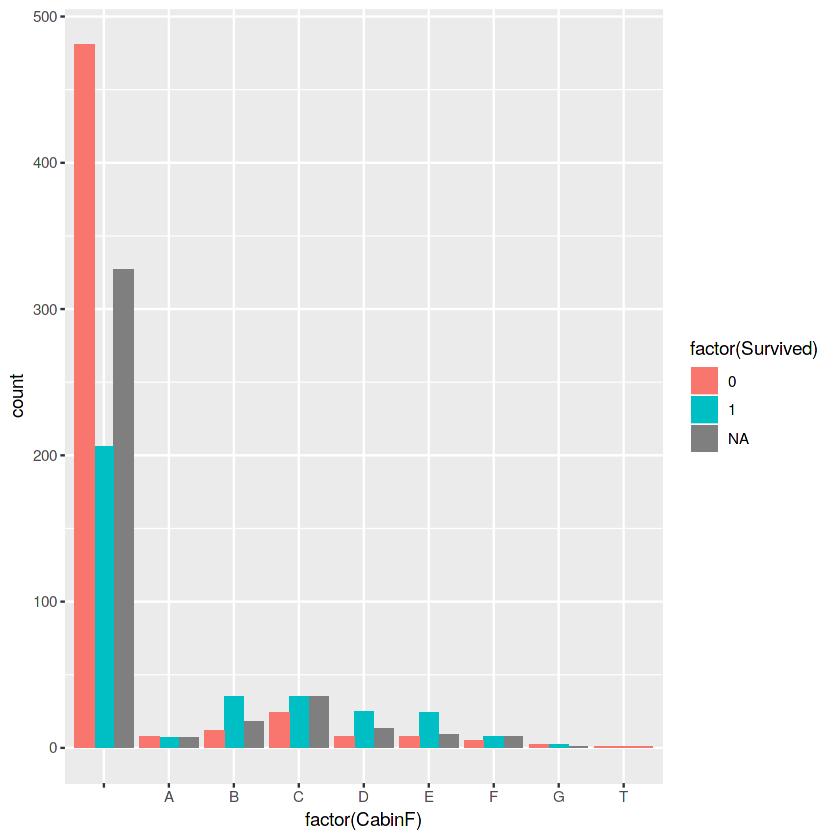

In [12]:
str(full$Cabin)
head(full$Cabin)
sample(table(full$Cabin), size = 7)

# As we see,
# Cabin contain variative value, some of them are:
# 1. Initially with first character A, B, C, D, etc
# 2. Space character ""

# We will categorized this based on first character of cabin
sum(full$Cabin == "") # The dataset has 1014 Cabin which has "" value

#Get first character of Cabin and save it to CabinF
full$CabinF <- substring(full$Cabin,1,1)
table(full$CabinF)

# Distribution survivor in Cabin Category
ggplot(full, aes(x = factor(CabinF), fill = factor(Survived))) + geom_bar(position = 'dodge')

#Make smaller category in Cabin
full$CabinCat[full$CabinF == "A"] <- "A"
full$CabinCat[full$CabinF == "B"] <- "B"
full$CabinCat[full$CabinF == "C"] <- "C"
full$CabinCat[full$CabinF == "D"] <- "D"
full$CabinCat[full$CabinF == "E"] <- "E"
full$CabinCat[full$CabinF == "F"] <- "F"

full$CabinCat[full$CabinF == "G"] <- "Y" # Will categorize this cabin to category Y
full$CabinCat[full$CabinF == "T"] <- "Y" # Will categorize this cabin to category Y
full$CabinCat[full$CabinF == ""] <- "Y" # Will categorize this cabin to category Y

table(full$CabinCat)


#### 7. Age - Age of Passenger in years
Let's complete a lot missing value in Age

[1] 263

[1] 0

      
       0 1
  0.17 0 0
  0.33 0 0
  0.42 0 1
  0.67 0 1
  0.75 0 2
  0.83 0 2

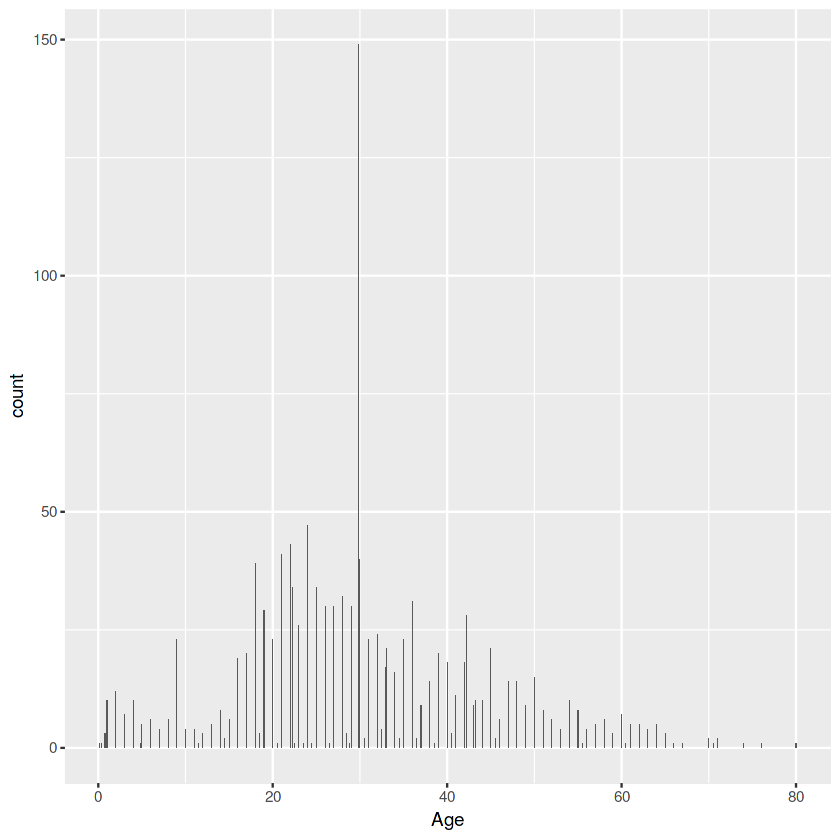

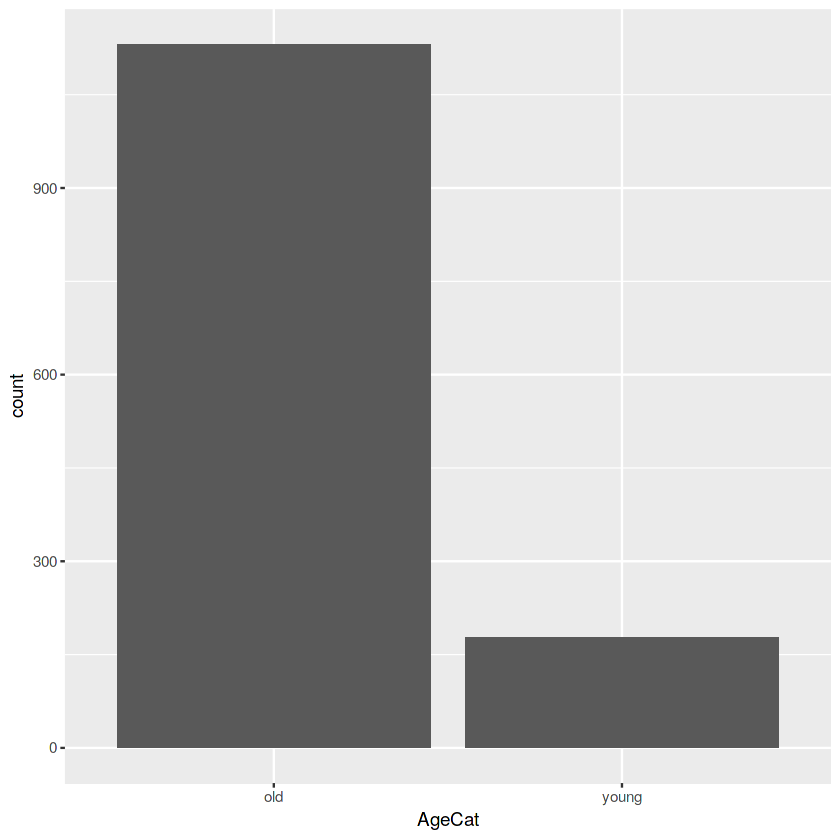

In [13]:
# Check if Age is null
sum(is.na(full$Age))

# Prepare to complete these 263 missing data
# We will use second level prediciton to predict Age based on several feature we already have
# First we should pick the significant variable to define Age :
# Based on the writer code, we will use : Pclass, SibSp, CabinCat, and TitleCat as the most correlated

# Temporal dataset train and test
temp_train <- full[!(is.na(full$Age)), c('PassengerId','Pclass','Age','SibSp','CabinCat','TitleCat')]
temp_test <- full[is.na(full$Age), c('PassengerId','Pclass','Age','SibSp','CabinCat','TitleCat')]

# Age Prediction
temp_model <- rpart(Age ~ Pclass + SibSp + CabinCat + TitleCat, data = temp_train)

# Prediction result
temp_result <- predict(temp_model, temp_test)

# Use the result
temp_test$Age <- temp_result
full[is.na(full$Age),]$Age <- temp_test$Age

# Check if there still null value in Age
sum(is.na(full$Age))

# Yeah we finally completed the missing Age!

# It is time to dig deeper in Age.
# I want to see how many data which have particular value in this data

head(table(full$Age, full$Survived))
# It turns out we have too many values of Age within.
#I want to reduce categorical value of Age here. Were is the point I could separate the range of this Age.

# Distribution of Age and Survival
ggplot(full, aes(x = Age)) + geom_bar(position = 'dodge')

# After seeing distribution of Age, we could split it into two groups which is young and old (17 years)
full$AgeCat[full$Age <= 17] <- 'young'
full$AgeCat[full$Age > 17] <- 'old'
full$AgeCat <- as.factor(full$AgeCat)

# New Distribution using AgeCat and Survival
ggplot(full, aes(x = AgeCat, fill = Survived)) + geom_bar(position = 'dodge')



#### 8. Ticket - Ticket Number

In [14]:
# First see what is the composition of this field
str(full$Ticket)
summary(full$Ticket)
sample(table(full$Ticket), size = 7)

# Based on this, we know that one ticket may belong to many passenger which means the ticket is for
# family use. We will categorize this ticket to Single or notSingle ticket.

full[full$Ticket == "2668",]
sum(full$Ticket == "2668")

#full$numTicket <- sum(as.factor(full$Ticket), na.rm = TRUE)

#Single Ticket
# full$TicketCat[count((as.factor(full$Ticket)), na.rm = TRUE) == 1] <- 'Single'

#Family Ticket
# full$TicketCat[count((as.factor(full$Ticket)), na.rm = TRUE) > 1] <- 'Family'

# table(full$TicketCat)


 chr [1:1309] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" "373450" ...


   Length     Class      Mode 
     1309 character character 


  315087     2696 PC 17599   235509   113510   244368   363294 
       1        1        2        1        1        1        1 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParchCat,SibSpCat,Title,TitleCat,CabinF,CabinCat,AgeCat
129,129,1,3,"Peter, Miss. Anna",female,8.992747,1,1,2668,22.3583,F E69,C,1,1,Miss,2,F,F,young
534,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,32.951456,0,2,2668,22.3583,,C,2,0,Mrs,4,,Y,old
1309,1309,NA,3,"Peter, Master. Michael J",male,8.992747,1,1,2668,22.3583,,C,1,1,Master,3,,Y,young


[1] 3

#### 9. Family Size
I want to take another feature engineering that tells number of family size.
Not based on ticket but on Parch and SibSp.
As we know Parch represent number of children/parent aboard and SibSp represent number of sibling aboard to Titanic.

We can formulize that Family size = Parch + SibSp + 1

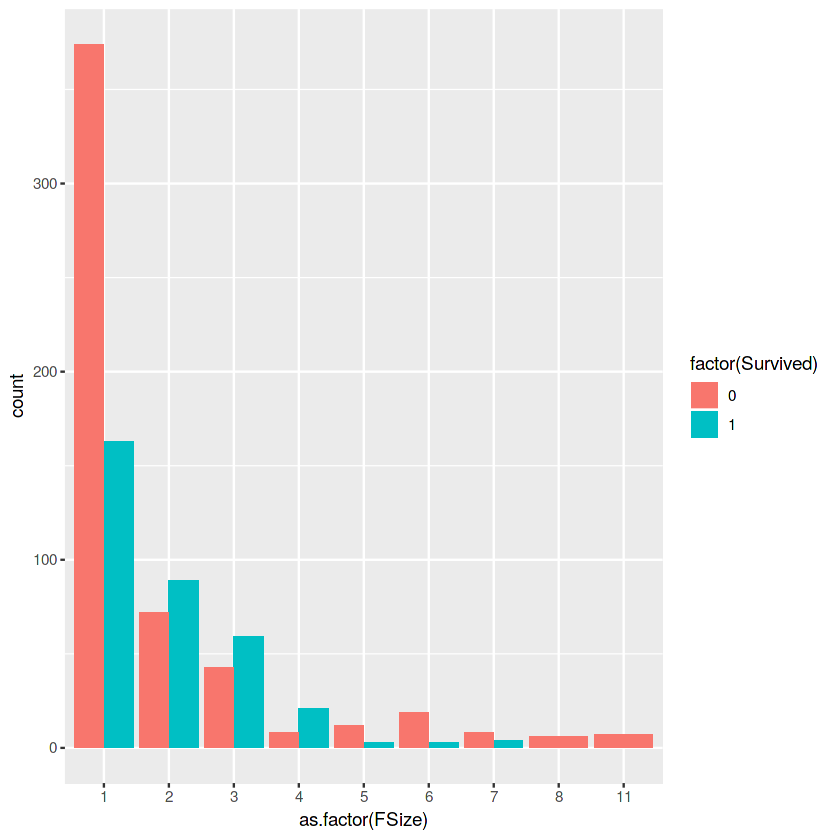

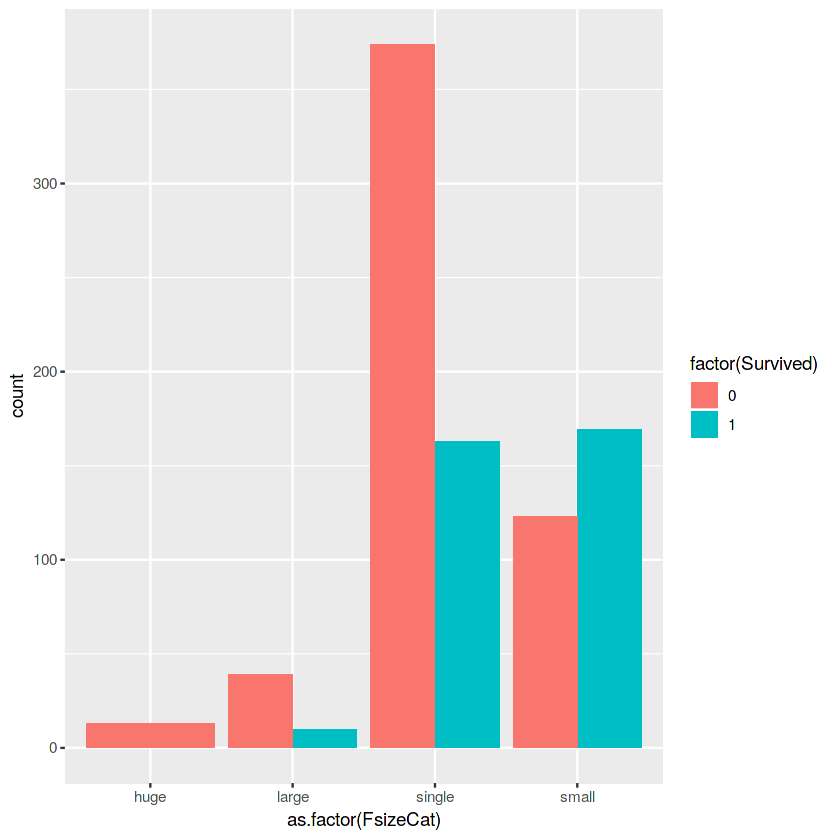

In [15]:
# Generate family size
full$FSize <- full$Parch + full$SibSp + 1

# See the relation to Survival rate
ggplot(full[1:891,], aes(x = as.factor(FSize) , fill = factor(Survived))) + geom_bar(position = 'dodge')

# Categorize family size into 4 groups i.e. single, small, large, and huge
full$FsizeCat[full$FSize == 1] <- 'single'
full$FsizeCat[full$FSize == 2] <- 'small'
full$FsizeCat[full$FSize == 3] <- 'small'
full$FsizeCat[full$FSize == 4] <- 'small'
full$FsizeCat[full$FSize > 4 & full$FSize < 8] <- 'large'
full$FsizeCat[full$FSize > 7] <- 'huge'

# See the relation to Survival rate
ggplot(full[1:891,], aes(x = as.factor(FsizeCat) , fill = factor(Survived))) + geom_bar(position = 'dodge')


### Model
As far we have many feature that we could use to predict the survival rate of each Titanic's passanger.

Let's predict using : Pclass, Sex, Age, Fare, Embarked, ParchCat, SibSpCat, TitleCat, CabinCat, FsizeCat

Prepare train and test dataset.

Generate some model based on this dataset.
1. Random Forest Model
2. Binary Tree Model
3. SVM


In [16]:
#First make sure Embarked, CabinCat, FsizeCat in factor type
full$Embarked <- as.factor(full$Embarked)
full$CabinCat <- as.factor(full$CabinCat)
full$FsizeCat <- as.factor(full$FsizeCat)

# Segregate two dataset (Test & Train)
train <- full[1:891, ]
test <- full[892:1309, ]

In [17]:
#Random Forest Model
rf_model <- randomForest(factor(Survived)  ~ Pclass + Age + Fare + Embarked + ParchCat 
                         + SibSpCat + TitleCat + CabinCat + FsizeCat, data = train )

#Binary Tree Model
bt_model <- rpart(factor(Survived) ~ Pclass + Sex + Age + Fare + Embarked + ParchCat 
                  + SibSpCat + TitleCat + CabinCat + FsizeCat, data = train )

#SVM
svm_model <- svm(factor(Survived) ~ Pclass + Sex + Age + Fare + Embarked + ParchCat 
                 + SibSpCat + TitleCat + CabinCat + FsizeCat, data = train)

In [18]:
#Result Prediction

#Predict Random Forest Model
rf_result <- predict(rf_model, test)

#Binary Tree Model
bt_result <- predict(bt_model, test)

#SVM
svm_result <- predict(svm_model, test[,-2]) #Exclude the field "Survived"

In [19]:
#Solution Random Forest Model
rf_solution <- data.frame(PassengerId = test$PassengerId, Survived = rf_result)

#Solution Binary Tree Model
bt_solution <- data.frame(PassengerId = test$PassengerId, Survived = round(bt_result[,2], digits = 0))

#Solution SVM Model
svm_solution <- data.frame(PassengerId = test$PassengerId, Survived = svm_result)

# WRITE SOLUTION
#Write the RF_Solution
write.csv(rf_solution, file = "rf_solution.csv", row.names = F)

#Write the Binary Tree Solution
write.csv(bt_solution, file = "bt_solution.csv", row.names = F)

#Write the Binary Tree Solution
write.csv(svm_solution, file = "svm_solution.csv", row.names = F)

After submitting the results, we got accuracy as follow:
* RF_Solution earn 0.75598
* BinaryTree_Solution earn 0.79425
* SVM_Solution earn 0.78947

Binary Tree has higher accuracy (79,425%)